In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Load final variants

In [2]:
import pandas as pd
import numpy as np

df_final_variants = pd.read_csv('data/round2/wet-lab/final_variants_selected.csv')
df_final_variants.head()

,Round,Variants,Activity,Mutations
0,R1,MC3-1-H7,1.44,S3Y/S24P/A98S/A169G/G202C/Y209H/T213R/N218S/T2...
1,R1,MC3-4-H12,2.63,S3V/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S25...
2,R1,MC3-7-G5,2.77,S24P/A98S/Q206L/Y209H/T213R/N218S/T224A/S256K/...
3,R1,MC3-8-B10,2.77,S3T/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S256K
4,R1,MC4-1-D7,3.03,S3V/N76D/N204S/Y209L/T213E/N218S/T224A/S256N


In [4]:
# convert the mutations into a pos2aa dictionary
names = []
activities = []
positions = []
amino_acids = []
savinase = 'AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGI*STHPDLNIRGGASFVPGEPST*QDGNGHGTHVAGTIAALNNSIGVLGVAPSAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSG*AGS***ISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR'

for i, row in df_final_variants.iterrows():
    pos2aa = {}
    for mutation in row['Mutations'].split('/'):
        pos = int(mutation[1:-1])
        aa = mutation[-1]
        pos2aa[pos] = aa
    positions.append(list(pos2aa.keys()))
    amino_acids.append(list(pos2aa.values()))
    names.append(row['Variants'])
    activities.append(row['Activity'])

all_positions = list(set([pos for pos_list in positions for pos in pos_list]))
all_positions.sort()
print(all_positions)

positions2aa = {pos: [] for pos in all_positions}
for pos_list, aa_list in zip(positions, amino_acids):
    for pos in all_positions:
        if pos in pos_list:
            positions2aa[pos].append(aa_list[pos_list.index(pos)])
        else:
            positions2aa[pos].append(savinase[pos-1])

df_final_variants_pos2aa = pd.DataFrame(positions2aa)
df_final_variants_pos2aa['Names'] = names
df_final_variants_pos2aa['Activities'] = activities
df_final_variants_pos2aa['Mutations'] = df_final_variants_pos2aa.merge(df_final_variants[['Variants', 'Mutations']], left_on='Names', right_on='Variants')['Mutations']

def get_mut_seq(row, positions, wt=savinase):
    seq = list(wt)
    for pos in positions:
        seq[int(pos)-1] = row[pos]  # Use the first amino acid for the position
    return ''.join(seq).replace('*', '')

df_final_variants_pos2aa['seq'] = df_final_variants_pos2aa.apply(
    lambda row: get_mut_seq(row, all_positions, wt=savinase), axis=1)
df_final_variants_pos2aa.to_csv('data/round2/wet-lab/final_variants_pos2aa.csv', index=False)
df_final_variants_pos2aa.head()

[3, 24, 43, 76, 88, 98, 99, 131, 152, 169, 185, 194, 202, 204, 206, 209, 213, 218, 224, 230, 256, 265, 271]


,3,24,43,76,88,98,99,131,152,169,...,218,224,230,256,265,271,Names,Activities,Mutations,seq
0,Y,P,N,N,A,S,S,P,A,G,...,S,A,A,N,S,E,MC3-1-H7,1.44,S3Y/S24P/A98S/A169G/G202C/Y209H/T213R/N218S/T2...,AQYVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLNIRGG...
1,V,P,K,N,A,S,S,P,A,A,...,S,A,A,K,S,Q,MC3-4-H12,2.63,S3V/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S25...,AQVVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLKIRGG...
2,S,P,N,N,A,S,S,P,A,A,...,S,A,A,K,S,Q,MC3-7-G5,2.77,S24P/A98S/Q206L/Y209H/T213R/N218S/T224A/S256K/...,AQSVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLNIRGG...
3,T,P,K,N,A,S,S,P,A,A,...,S,A,A,K,S,E,MC3-8-B10,2.77,S3T/S24P/N43K/A98S/Y209L/T213R/N218S/T224A/S256K,AQTVPWGISRVQAPAAHNRGLTGPGVKVAVLDTGISTHPDLKIRGG...
4,V,S,N,D,A,A,S,P,A,A,...,S,A,A,N,S,E,MC4-1-D7,3.03,S3V/N76D/N204S/Y209L/T213E/N218S/T224A/S256N,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...


In [7]:
variants_kcat_km = ['MC3-7-G5', 'MC4-1-D7', 'MC5-1-B10', 'MC5-3-C9', 'MC5-6-H6', 'R2-10-B11', 'R2-10-D8', 'R2-15-H8', 'R2-3-A4', 'R2-4-H5', 'wt',]

df_variants_kcat_km = df_final_variants_pos2aa[df_final_variants_pos2aa['Names'].isin(variants_kcat_km)].copy()
savinase_aas = [savinase[pos-1] for pos in all_positions]
# add WT row in the df
df_variants_kcat_km.loc[len(df_variants_kcat_km)] = savinase_aas + ['WT', 1.0, np.nan, savinase]
df_variants_kcat_km.sort_values(by='Activities', inplace=True, ascending=False)
df_variants_kcat_km.to_csv('data/round2/wet-lab/top_mut_cat_coeffs_agg_variants.csv', index=False)
df_variants_kcat_km.head(2)

,3,24,43,76,88,98,99,131,152,169,...,218,224,230,256,265,271,Names,Activities,Mutations,seq
17,T,S,R,D,A,S,N,S,A,A,...,S,A,A,K,A,E,R2-10-B11,4.01,S3T/N43R/N76D/A98S/S99N/P131S/A194S/Y209L/T213...,AQTVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...
9,V,S,N,N,S,S,N,S,A,A,...,S,A,V,Y,T,Q,R2-3-A4,3.95,S3V/A88S/A98S/S99N/P131S/Y209L/T213A/N218S/T22...,AQVVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGG...


In [8]:
df_new_pos_mut = pd.read_csv('data/round2/wet-lab/improved_new_muts_pos.csv')
df_new_pos_mut.head()

new_muts = []
for i, row in df_new_pos_mut.iterrows():
    pos = row['pos']
    aa_list = eval(row['new_muts'])
    for aa in aa_list:
        new_muts.append(f'{pos}{aa}')
new_muts = set(new_muts)
print(len(new_muts))

wt_aas = set([f"{pos}{savinase[pos-1]}" for pos in all_positions])
print(len(wt_aas))

41
23


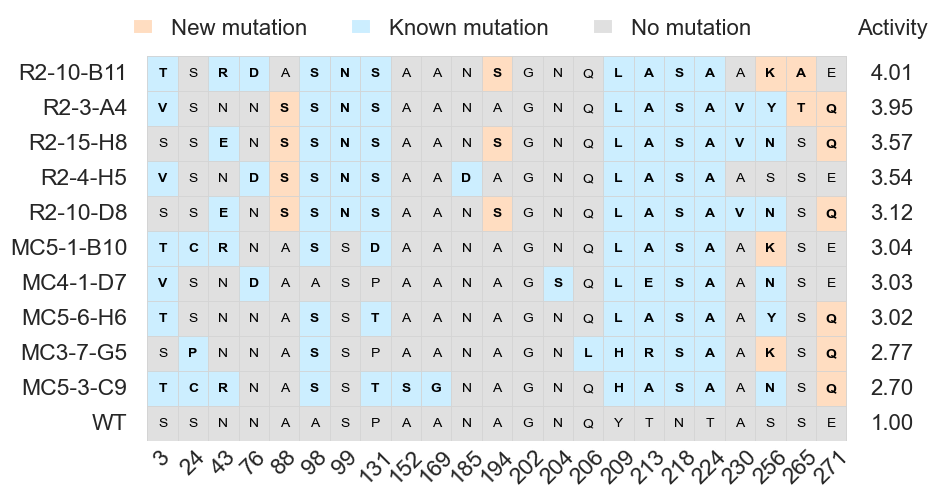

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

df = df_variants_kcat_km.reset_index()
sequence_cols = all_positions
sequence_df = df[sequence_cols]
col_name_to_idx = {col: i for i, col in enumerate(sequence_cols)}

colors = {
    'New mutation': '#FFDDC1',  # Light Orange/Peach
    'Known mutation': '#CCEEFF', # Light Blue
    'No mutation': '#E0E0E0'   # Light Gray
}

def get_aa_type(pos, aa):
    if f"{pos}{aa}" in new_muts:
        return 'New mutation'
    elif f"{pos}{aa}" in wt_aas:
        return 'No mutation'
    else:
        return 'Known mutation'

from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax(figsize=(10, 5))
plot_style_utils.prettify_ax(ax)

heatmap_data = np.ones_like(sequence_df, dtype=float)
sns.heatmap(heatmap_data, annot=False, cmap='Greys', cbar=False, linewidths=0.5, linecolor='lightgray', ax=ax)

for i, row in sequence_df.iterrows():
    for j, pos in enumerate(sequence_df.columns):
        aa = row[pos]
        aa_type = get_aa_type(pos, aa)

        color = colors.get(aa_type, '#E0E0E0')  # Default to 'No mutation' color if not found
        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor='lightgray', linewidth=0.5)
        ax.add_patch(rect)
        if aa_type == 'No mutation':
            ax.text(j + 0.5, i + 0.5, aa, ha='center', va='center', color='black', fontsize=10)
        else:
            ax.text(j + 0.5, i + 0.5, aa, ha='center', va='center', color='black', fontweight='bold', fontsize=10)
            
# Set x-axis and y-axis labels
ax.set_xticks(np.arange(sequence_df.shape[1]) + 0.5)
ax.set_xticklabels(sequence_cols, rotation=45, ha='center')

ax.set_yticks(np.arange(sequence_df.shape[0]) + 0.5)
ax.set_yticklabels(df['Names'], rotation=0)

ax.tick_params(axis='x', which='both', length=0) # Hide x-axis ticks
ax.tick_params(axis='y', which='both', length=0) # Hide y-axis ticks

activity_x_position = sequence_df.shape[1] + 1.0
ax.text(activity_x_position + 0.5, -0.5, 'Activity', ha='center', va='bottom', fontsize=16)
for i, activity in enumerate(df['Activities']):
    ax.text(activity_x_position + 0.5, i + 0.5, f'{activity:.2f}', ha='center', va='center', fontsize=16)

ax.set_xlim(-0.5, activity_x_position + 1.0)

# Create a legend for amino acid properties
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc=colors['New mutation'], label='New mutation'),
    plt.Rectangle((0, 0), 1, 1, fc=colors['Known mutation'], label='Known mutation'),
    plt.Rectangle((0, 0), 1, 1, fc=colors['No mutation'], label='No mutation')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.4, 1.15), frameon=False, fontsize=16, ncols=3, handlelength=0.9)
plot_style_utils.save_for_pub(fig, 'figures/round2/final_variants_pos2aa_heatmap')
